In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline 
#using this we are able to plot visulization inside the notebook
# import numpy as np
# import pandas as pd
# from sklearn.linear_model import LinearRegression
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# %matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\harsh\Desktop\LAB ML\auto-mpg.csv")

In [3]:
data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [4]:
# 7 variables: 
#
# MPG (miles per gallon),

# (VAR1)cylinders, 
# (VAR2)engine displacement (cu. inches), 
# (VAR3)horsepower,
# (VAR4)vehicle weight (lbs.), 
# (VAR5)time to accelerate from O to 60 mph (sec.),
# (VAR6)model year (modulo 100), and 
# (VAR7)origin of car (1. American, 2. European,3. Japanese).
#
# Also provided are the car labels (types) 
# Missing data values are marked by series of question marks.


# So on the basis of 8 variable we are going to predict cars MPG

In [5]:
data.isnull().sum()
#so No empty data

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
data.shape

(398, 9)

# Dummy Variables

In [7]:
data['origin'] = data['origin'].replace({1:'america',2:'europe',3:'asia'})

In [8]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,america,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,america,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,america,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,america,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,america,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,america,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,america,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,america,ford ranger


In [9]:
data = data.drop('car name', axis =1)

In [10]:
data.dtypes
#here horsepower needs to be int but python recognises it as object

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [11]:
data = data.drop('horsepower', axis = 1)

In [12]:
data

,mpg,cylinders,displacement,weight,acceleration,model year,origin
0,18.0,8,307.0,3504,12.0,70,america
1,15.0,8,350.0,3693,11.5,70,america
2,18.0,8,318.0,3436,11.0,70,america
3,16.0,8,304.0,3433,12.0,70,america
4,17.0,8,302.0,3449,10.5,70,america
...,...,...,...,...,...,...,...
393,27.0,4,140.0,2790,15.6,82,america
394,44.0,4,97.0,2130,24.6,82,europe
395,32.0,4,135.0,2295,11.6,82,america
396,28.0,4,120.0,2625,18.6,82,america


# Create Dummy Variables

In [13]:
# data = pd.get_dummies(data,['origin'])
data = pd.get_dummies(data,['origin'])

In [14]:
data

,mpg,cylinders,displacement,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,2130,24.6,82,0,0,1
395,32.0,4,135.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,2625,18.6,82,1,0,0


# BiVariate Plot

In [16]:
data_attr = data.iloc[:,0:6]
data_attr

,mpg,cylinders,displacement,weight,acceleration,model year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70
...,...,...,...,...,...,...
393,27.0,4,140.0,2790,15.6,82
394,44.0,4,97.0,2130,24.6,82
395,32.0,4,135.0,2295,11.6,82
396,28.0,4,120.0,2625,18.6,82


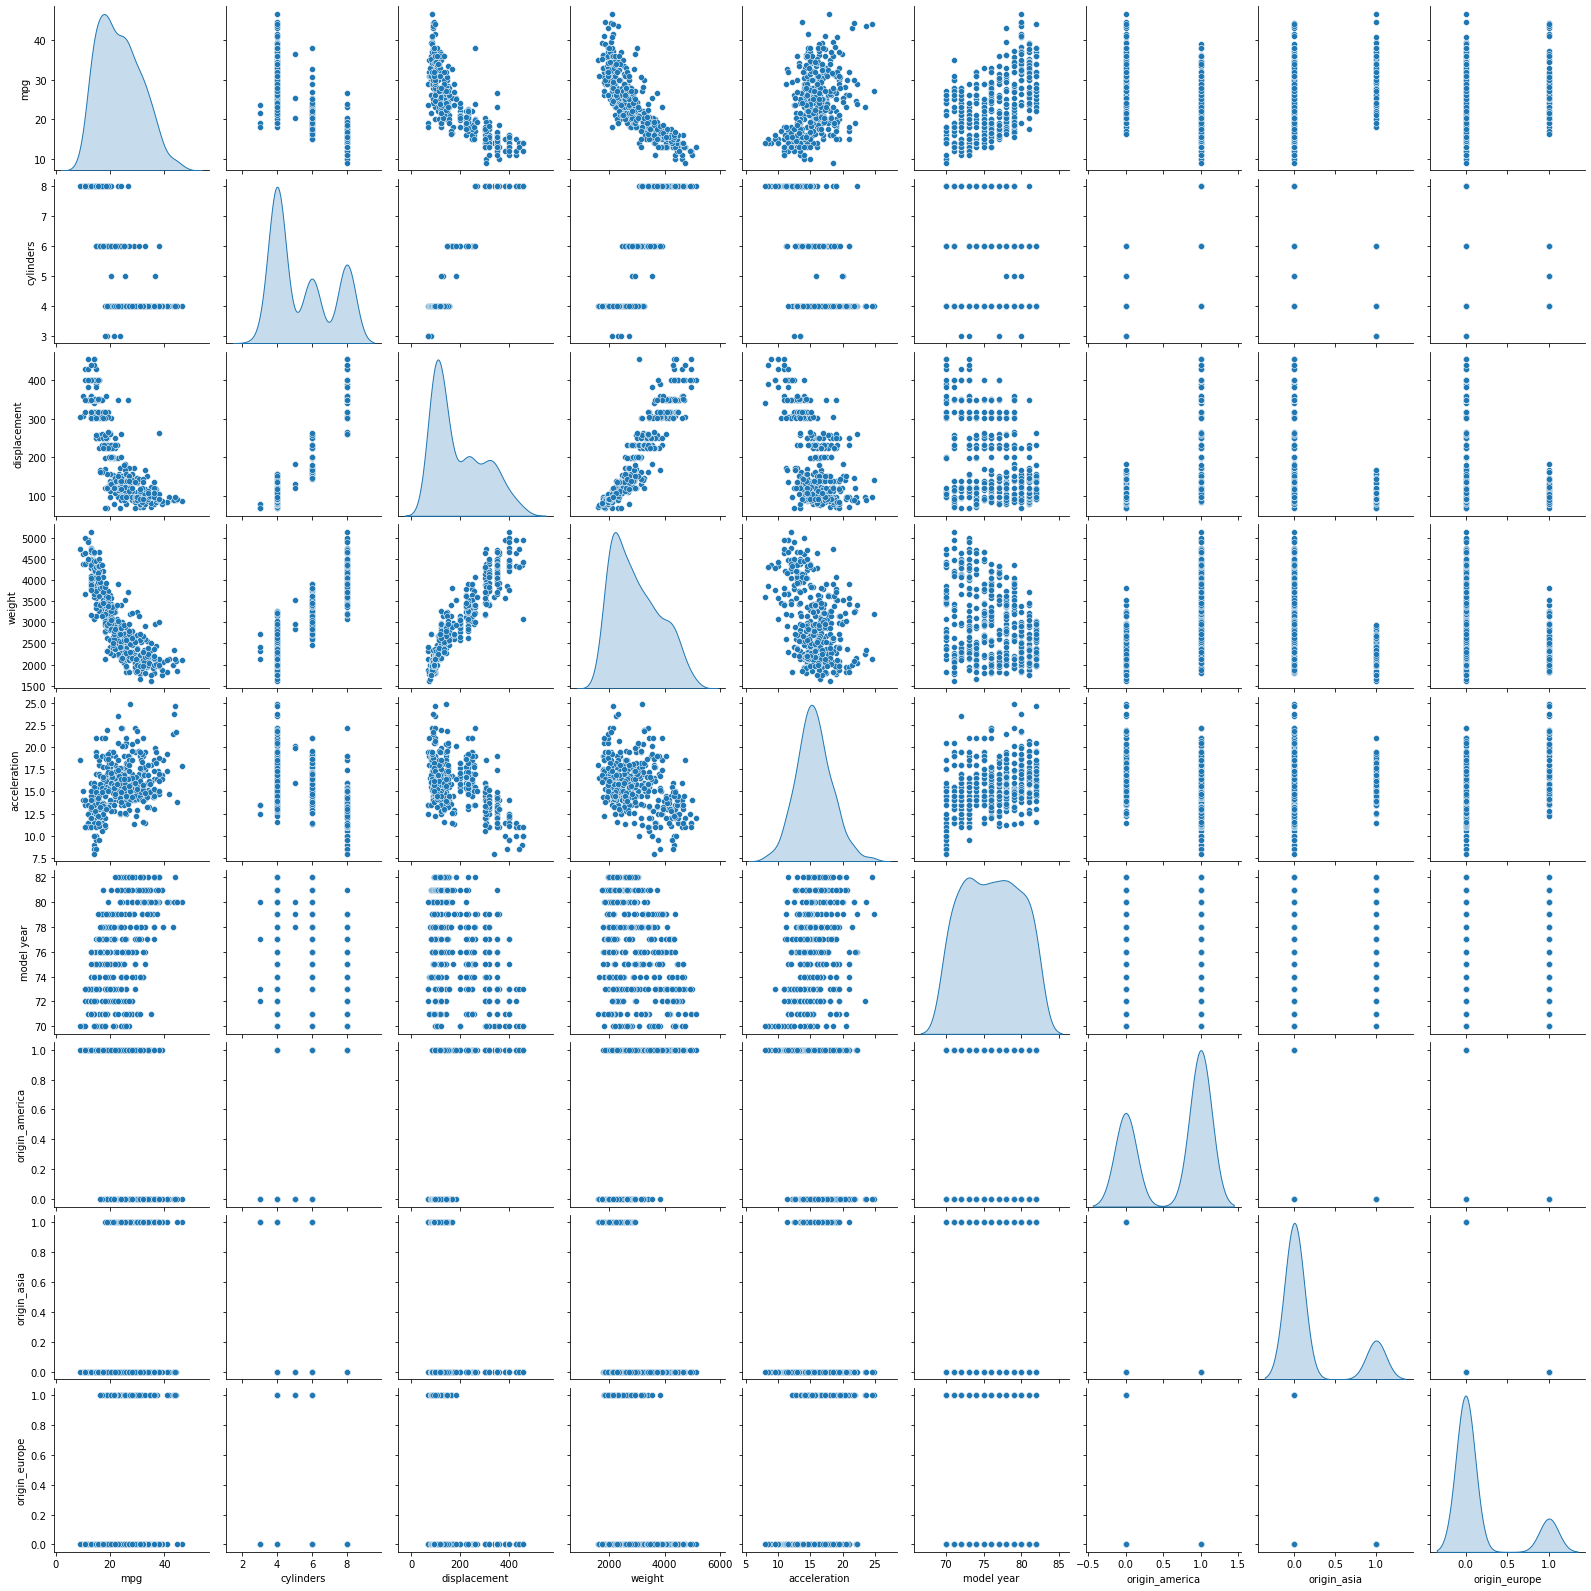

In [18]:
sns.pairplot(data,diag_kind='kde')

# Split data

In [24]:
 y = data.iloc[:,0]

In [25]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [29]:
X = data.iloc[:,1:]

In [30]:
X

,cylinders,displacement,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,8,307.0,3504,12.0,70,1,0,0
1,8,350.0,3693,11.5,70,1,0,0
2,8,318.0,3436,11.0,70,1,0,0
3,8,304.0,3433,12.0,70,1,0,0
4,8,302.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...
393,4,140.0,2790,15.6,82,1,0,0
394,4,97.0,2130,24.6,82,0,0,1
395,4,135.0,2295,11.6,82,1,0,0
396,4,120.0,2625,18.6,82,1,0,0


In [32]:
x_train,x_test,y_train,y_test = train_test_split(X,y ,test_size = 0.3, random_state = 1)

In [33]:
x_train

,cylinders,displacement,weight,acceleration,model year,origin_america,origin_asia,origin_europe
350,4,105.0,2215,14.9,81,1,0,0
59,4,97.0,2254,23.5,72,0,0,1
120,4,121.0,2868,15.5,73,0,0,1
12,8,400.0,3761,9.5,70,1,0,0
349,4,91.0,1985,16.0,81,0,1,0
...,...,...,...,...,...,...,...,...
393,4,140.0,2790,15.6,82,1,0,0
255,4,140.0,2720,15.4,78,1,0,0
72,8,304.0,3892,12.5,72,1,0,0
235,4,97.0,2265,18.2,77,0,1,0


In [34]:
x_test

,cylinders,displacement,weight,acceleration,model year,origin_america,origin_asia,origin_europe
174,6,171.0,2984,14.5,75,1,0,0
359,4,141.0,3230,20.4,81,0,0,1
250,8,318.0,3735,13.2,78,1,0,0
274,5,131.0,2830,15.9,78,0,0,1
283,6,232.0,3265,18.2,79,1,0,0
...,...,...,...,...,...,...,...,...
382,4,108.0,2245,16.9,82,0,1,0
39,8,400.0,4464,11.5,71,1,0,0
171,4,134.0,2702,13.5,75,0,1,0
271,4,156.0,2745,16.7,78,1,0,0


In [35]:
y_test

174    18.0
359    28.1
250    19.4
274    20.3
283    20.2
       ... 
382    34.0
39     14.0
171    24.0
271    23.2
247    39.4
Name: mpg, Length: 120, dtype: float64

# Model

In [36]:
regression_model = LinearRegression()
regression_model.fit(x_train,y_train)

LinearRegression()

In [43]:
regression_model.coef_

array([-0.40255353,  0.02717215, -0.00788287,  0.15580234,  0.85092108,
       -1.70181454,  0.52082743,  1.18098711])

In [44]:
regression_model.intercept_

-22.360645365489344

In [45]:
regression_model.predict(x_test)

array([20.7243992 , 27.68271843, 20.34378654, 26.90771609, 24.14696817,
       15.86236989, 29.49590705, 34.42840156, 16.58118524, 10.82711871,
       30.3596953 , 16.25860255, 22.37652027, 27.51769897, 36.4198046 ,
       23.36113197, 11.27694269, 19.98855276,  9.24697819, 33.15038122,
       26.18928029, 32.33312291, 20.62098768, 25.06969221, 25.96338717,
       29.86332513, 32.50191147, 32.41631584, 14.93549688, 30.22363507,
       27.55602449, 11.69796695, 21.29219082, 28.59513629, 24.84502817,
       14.05028348, 26.64203697,  9.8834359 , 31.48722424, 23.70998108,
       24.1325947 , 24.39673101, 20.86994227, 33.9367272 , 26.17187807,
       21.98841972, 21.00932146, 11.67194136, 28.3838825 , 18.7762099 ,
       24.21877113, 26.81139646, 16.80197335, 12.00426183, 28.63142975,
       25.06462627, 10.83279026, 12.99793144, 30.49133884, 35.6453652 ,
       36.61443274, 35.75442683, 17.88755022, 27.62990786, 20.68879006,
       33.33611406, 26.75029528, 26.42390637, 29.73793384, 12.33

In [48]:
regression_model.predict(np.array([6,171,2984,14.5,75,1,0,0]).reshape(1,-1))

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20.7243992])

In [49]:
regression_model.score(x_test,y_test)*100

84.48015255068313

In [50]:
from sklearn import metrics
predictor = regression_model.predict(x_test)
metrics.mean_absolute_error(y_test,predictor)

2.3258495815082805

In [52]:
MAE = metrics.mean_absolute_error(y_test,predictor)
RMSE = np.sqrt(MAE)
RMSE

1.5250736315038302